# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

64dd57f82feaae3b8129b3bee0c55f07


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
        query_url = base_url+'dalvik'+"&appid="+weather_api_key
        weather_response = requests.get(query_url).json()
        weather_response

{'coord': {'lon': -18.53, 'lat': 65.97},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 281.15,
  'feels_like': 268.84,
  'temp_min': 281.15,
  'temp_max': 281.15,
  'pressure': 1011,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 15.4, 'deg': 182},
 'clouds': {'all': 75},
 'dt': 1587251581,
 'sys': {'type': 1,
  'id': 83,
  'country': 'IS',
  'sunrise': 1587187223,
  'sunset': 1587243956},
 'timezone': 0,
 'id': 2632287,
 'name': 'Dalvik',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
i=1
name = []
lng = []
lat = []
temp = []
humidity=[]
windspeed = []
clouds=[]
country = []
date = []
for city in cities:
    try:
        query_url = base_url+city+"&appid="+weather_api_key
        response = requests.get(query_url).json()
        name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {i} - {city}")
        i = i+1
    except:
        print("City not found. Skipping...")
    

Processing Record 1 - qaanaaq
Processing Record 2 - vaini
Processing Record 3 - avinurme
City not found. Skipping...
Processing Record 4 - husavik
Processing Record 5 - rikitea
Processing Record 6 - chivacoa
Processing Record 7 - pedasi
Processing Record 8 - jamestown
Processing Record 9 - kansanshi
Processing Record 10 - isangel
Processing Record 11 - yellowknife
Processing Record 12 - san patricio
Processing Record 13 - apatou
Processing Record 14 - punta arenas
Processing Record 15 - zuenoula
Processing Record 16 - port augusta
Processing Record 17 - puerto ayora
City not found. Skipping...
Processing Record 18 - atasu
Processing Record 19 - carnarvon
Processing Record 20 - dikson
Processing Record 21 - butaritari
Processing Record 22 - new norfolk
City not found. Skipping...
Processing Record 23 - iqaluit
Processing Record 24 - busselton
Processing Record 25 - beian
Processing Record 26 - ushuaia
Processing Record 27 - kaitangata
Processing Record 28 - tessalit
Processing Record 29

Processing Record 228 - sabha
Processing Record 229 - rovaniemi
Processing Record 230 - matagami
Processing Record 231 - cayenne
Processing Record 232 - benjamin constant
Processing Record 233 - ryotsu
Processing Record 234 - maryville
Processing Record 235 - thompson
Processing Record 236 - codrington
Processing Record 237 - viedma
Processing Record 238 - langsa
Processing Record 239 - ponta delgada
Processing Record 240 - cururupu
Processing Record 241 - vila velha
Processing Record 242 - pilot butte
Processing Record 243 - beringovskiy
Processing Record 244 - aklavik
Processing Record 245 - champasak
Processing Record 246 - kimbe
Processing Record 247 - acajutla
Processing Record 248 - barrow
City not found. Skipping...
Processing Record 249 - vardo
Processing Record 250 - pedernales
Processing Record 251 - san rafael del sur
Processing Record 252 - saint-pierre
City not found. Skipping...
Processing Record 253 - naze
Processing Record 254 - jiangyou
Processing Record 255 - lujiang


Processing Record 454 - calvinia
Processing Record 455 - pangkalanbuun
Processing Record 456 - adamovka
Processing Record 457 - warsaw
Processing Record 458 - kokopo
Processing Record 459 - barreiras
Processing Record 460 - udachnyy
Processing Record 461 - haines junction
Processing Record 462 - narsaq
Processing Record 463 - aiquile
Processing Record 464 - erbaa
Processing Record 465 - yar-sale
Processing Record 466 - semey
Processing Record 467 - yuancheng
Processing Record 468 - nome
Processing Record 469 - khandyga
Processing Record 470 - maxixe
Processing Record 471 - biak
City not found. Skipping...
Processing Record 472 - port maria
Processing Record 473 - pontianak
Processing Record 474 - kongolo
Processing Record 475 - robe
Processing Record 476 - bhanvad
Processing Record 477 - svetlogorsk
Processing Record 478 - jiguani
Processing Record 479 - katangli
Processing Record 480 - homer
Processing Record 481 - quelimane
Processing Record 482 - salitral
Processing Record 483 - bro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df = pd.DataFrame({'City':name,
           'Longitude':lng, 
           'Latitude': lat,
           'Temperature':temp, 
           'Humidity': humidity,
           'Wind Speed': windspeed,
           'Cloud Cover %':clouds,
           'Country': country,
            'Date':date})
data_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date
0,Qaanaaq,-69.36,77.48,267.42,88,8.61,100,GL,1587251581
1,Vaini,-175.20,-21.20,300.15,74,5.10,40,TO,1587251581
2,Avinurme,26.86,58.98,274.82,93,1.79,87,EE,1587251581
3,Husavik,-17.34,66.04,281.15,70,15.40,75,IS,1587251583
4,Rikitea,-134.97,-23.12,298.38,70,2.65,42,PF,1587251583
...,...,...,...,...,...,...,...,...,...
539,Singapore,103.85,1.29,301.15,83,1.37,75,SG,1587251320
540,Kungurtug,97.52,50.60,272.98,48,0.93,1,RU,1587251697
541,Soyo,12.37,-6.13,299.15,79,0.30,97,AO,1587251697
542,Ilhabela,-45.36,-23.78,295.44,77,3.06,83,BR,1587251698


In [6]:
data_df['Temperature'] = (((data_df['Temperature']-273.15)*1.8)+32)
data_df.head(20)

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date
0,Qaanaaq,-69.36,77.48,21.686,88,8.61,100,GL,1587251581
1,Vaini,-175.20,-21.20,80.600,74,5.10,40,TO,1587251581
2,Avinurme,26.86,58.98,35.006,93,1.79,87,EE,1587251581
3,Husavik,-17.34,66.04,46.400,70,15.40,75,IS,1587251583
4,Rikitea,-134.97,-23.12,77.414,70,2.65,42,PF,1587251583
5,Chivacoa,-68.89,10.16,74.426,71,2.73,42,VE,1587251583
6,Pedasí,-80.03,7.53,82.400,73,3.75,96,PA,1587251583
7,Jamestown,-79.24,42.10,46.004,41,6.20,1,US,1587251583
8,Kansanshi,26.43,-12.10,59.864,65,2.49,36,ZM,1587251583
9,Isangel,169.27,-19.55,80.600,88,3.10,75,VU,1587251583


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humhundred_df = data_df[data_df['Humidity']>100]
humhundred_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover %,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
data_df.to_csv("../output_data/cities.csv" , index = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

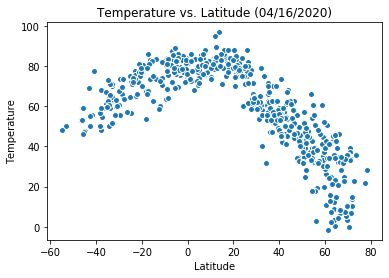

In [12]:
plt.scatter( data_df['Latitude'],data_df['Temperature'],edgecolor='white')
plt.title('Temperature vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig('../output_data/fig1.png')

## Latitude vs. Humidity Plot

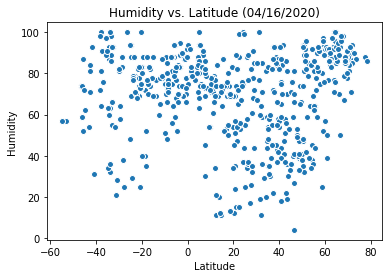

In [13]:
plt.scatter(data_df['Latitude'], data_df['Humidity'], edgecolor='white')
plt.title('Humidity vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/fig2.png')

## Latitude vs. Cloudiness Plot

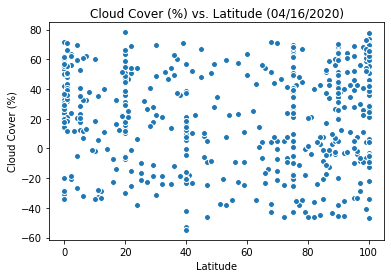

In [14]:
plt.scatter(data_df['Cloud Cover %'], data_df['Latitude'],edgecolor='white')
plt.title('Cloud Cover (%) vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.savefig('../output_data/fig3.png')

## Latitude vs. Wind Speed Plot

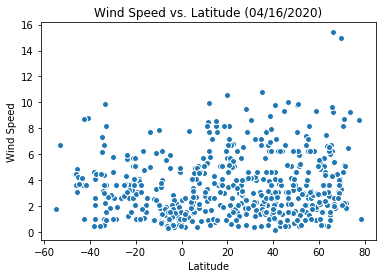

In [15]:
plt.scatter(data_df['Latitude'], data_df['Wind Speed'], edgecolor='white')
plt.title('Wind Speed vs. Latitude (04/16/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../output_data/fig4.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linregress():
    slope, intercept, r, p, std_err = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0, 1), xytext=(12, -12), va='top',
             xycoords ='axes fraction', textcoords='offset points',fontsize=15, color="red")

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
north_df = data_df[data_df['Latitude']>=0]
south_df = data_df[data_df['Latitude']<0]
south_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values=north_df['Temperature']
y_values= north_df['Latitude']
Linregress()
Max_temp_chart = plt.scatter(north_df['Latitude'],north_df['Temperature'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. MaxTemperature (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
Max_temp_chart = plt.scatter(south_df['Temperature'],south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Maximum Temperature (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
x_values=south_df['Temperature']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
north_humidity_chart = plt.scatter(north_df['Humidity'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
x_values=north_df['Humidity']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
south_humidity_chart = plt.scatter(south_df['Humidity'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values=south_df['Humidity']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
north_cloud_chart = plt.scatter(north_df['Cloud Cover %'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
x_values=north_df['Cloud Cover %']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
cloud_chart = plt.scatter(south_df['Cloud Cover %'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Humidity (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
x_values=south_df['Cloud Cover %']
y_values= south_df['Latitude']
Linregress()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
north_wind_df = plt.scatter(north_df['Wind Speed'], north_df['Latitude'], edgecolor='white')
plt.title('Northern Hemisphere Latitude vs. Wind Speed (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values=north_df['Wind Speed']
y_values= north_df['Latitude']
Linregress()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
south_wind_chart = plt.scatter(south_df['Wind Speed'], south_df['Latitude'], edgecolor='white')
plt.title('Southern Hemisphere Latitude vs. Wind Speed (04/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values=south_df['Wind Speed']
y_values= south_df['Latitude']
Linregress()

In [ ]:
#From investigating our data and the trends noticed we can see a general increase in temperature as we approach the equator, 
#but the heat is more pronounced in the northern hemisphere. 
#This could indicate the increasing temperatures as the north approaches the summer months.

In [ ]:
#we can also see that much cloud data congregates around specific points, which may be a factor of the way cloud data is reported. 
#A similar trend (resulting in numerous vertical groupings) can be observed in temperature reporting.
#Humidity in the Northern hemisphere also trends upward with latitude.